In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
import warnings

warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv('gsom_features.csv', delimiter=',')
dataset = dataset.dropna(axis=1, how='all')
dataset

,month,client_id,mou_out,mou_in,dou,city,gender,age,admin_distr
0,202402,3,494.772358,12.505930,55518.168779,Санкт-Петербург,m,18,Калининский район
1,202402,4,236.676925,824.589875,26677.707112,Москва,f,52,Северо-Западный административный округ
2,202402,14,46.571362,398.280407,20888.560440,Санкт-Петербург,f,16,Выборгский район
3,202402,17,313.251773,477.361593,7920.467840,Краснодар,m,35,Карасунский округ
4,202402,21,465.726682,81.042823,53525.453837,Казань,m,22,Ново-Савиновский район
...,...,...,...,...,...,...,...,...,...
1069012,202402,4608575,806.950379,75.040381,89972.830857,Москва,f,42,Восточный административный округ
1069013,202402,4608579,100.370202,23.059864,41814.076716,Санкт-Петербург,m,55,Фрунзенский район
1069014,202402,4608580,664.688086,16.988383,1848.316881,Санкт-Петербург,f,54,Кировский район
1069015,202402,4608591,121.710240,844.641192,48900.302330,Москва,f,44,Восточный административный округ


In [3]:
dataset.drop(['month'], axis=1, inplace=True)
dataset.describe()

,client_id,mou_out,mou_in,dou,age
count,1.069017e+06,1.069015e+06,1.069015e+06,1.069015e+06,1.069017e+06
mean,2.297749e+06,4.030867e+02,3.114129e+02,8.915028e+04,3.746810e+01
std,1.332894e+06,3.614109e+02,2.725051e+02,1.032247e+05,1.167215e+01
min,3.000000e+00,1.284208e-03,3.086858e-06,8.443934e-02,1.400000e+01
25%,1.144063e+06,1.645503e+02,1.265306e+02,3.818809e+04,2.900000e+01
50%,2.295376e+06,3.187388e+02,2.489467e+02,7.160615e+04,3.700000e+01
75%,3.449101e+06,5.329482e+02,4.174756e+02,1.149071e+05,4.400000e+01
max,4.608593e+06,1.926860e+04,9.235697e+03,1.357894e+07,1.000000e+02


In [4]:
dataset.isna().sum()

client_id      0
mou_out        2
mou_in         2
dou            2
city           0
gender         0
age            0
admin_distr    0
dtype: int64

In [5]:
# dataset.loc['b'].sum()

In [6]:
dataset = dataset.dropna()
dataset

,client_id,mou_out,mou_in,dou,city,gender,age,admin_distr
0,3,494.772358,12.505930,55518.168779,Санкт-Петербург,m,18,Калининский район
1,4,236.676925,824.589875,26677.707112,Москва,f,52,Северо-Западный административный округ
2,14,46.571362,398.280407,20888.560440,Санкт-Петербург,f,16,Выборгский район
3,17,313.251773,477.361593,7920.467840,Краснодар,m,35,Карасунский округ
4,21,465.726682,81.042823,53525.453837,Казань,m,22,Ново-Савиновский район
...,...,...,...,...,...,...,...,...
1069012,4608575,806.950379,75.040381,89972.830857,Москва,f,42,Восточный административный округ
1069013,4608579,100.370202,23.059864,41814.076716,Санкт-Петербург,m,55,Фрунзенский район
1069014,4608580,664.688086,16.988383,1848.316881,Санкт-Петербург,f,54,Кировский район
1069015,4608591,121.710240,844.641192,48900.302330,Москва,f,44,Восточный административный округ


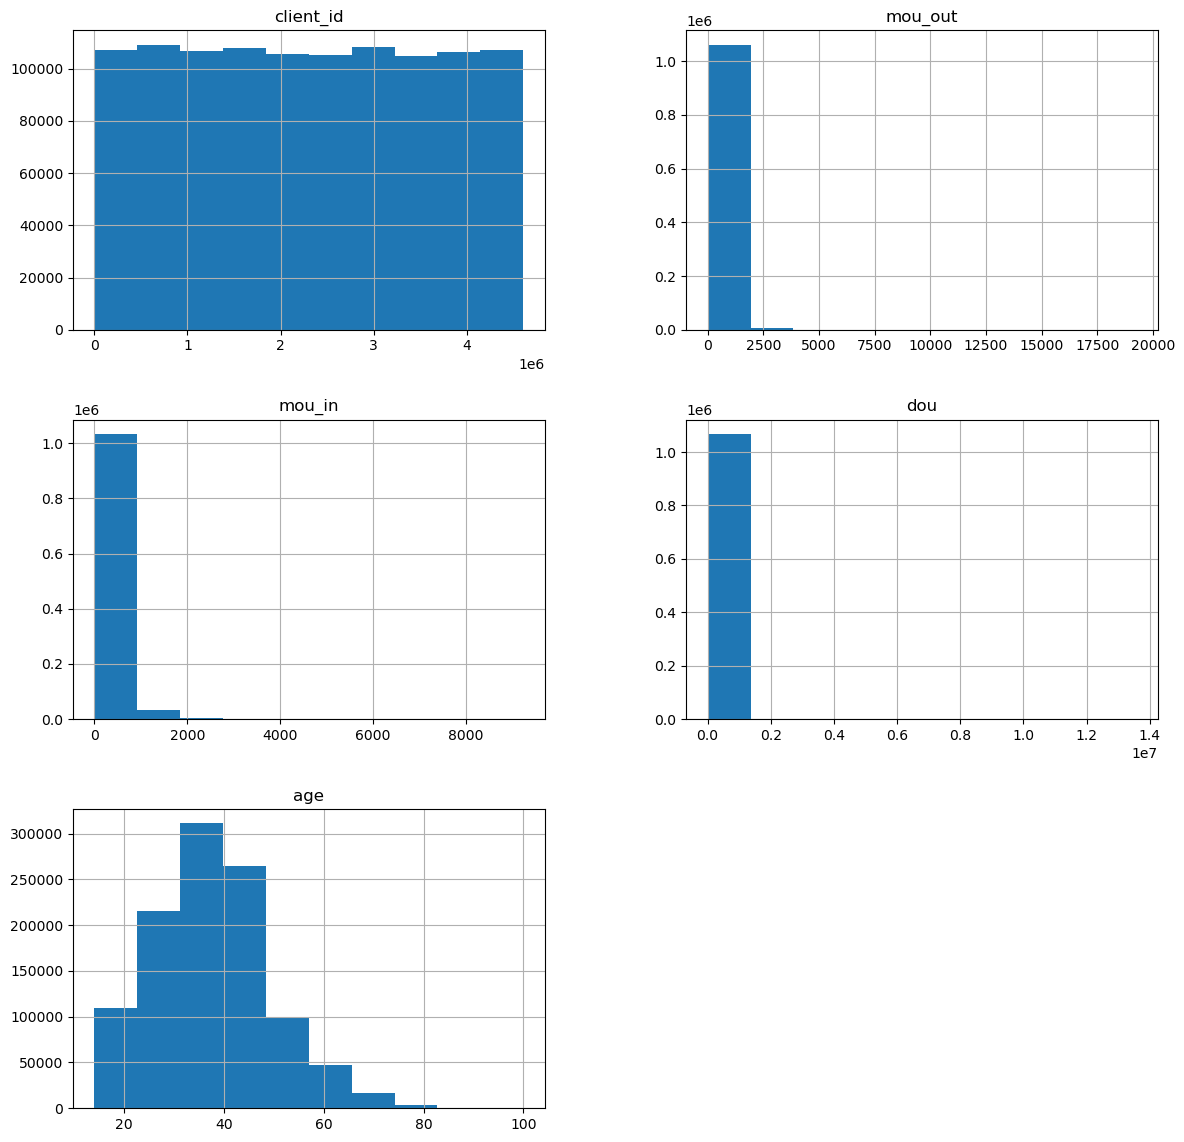

In [7]:
dataset.hist(figsize=(14, 14));

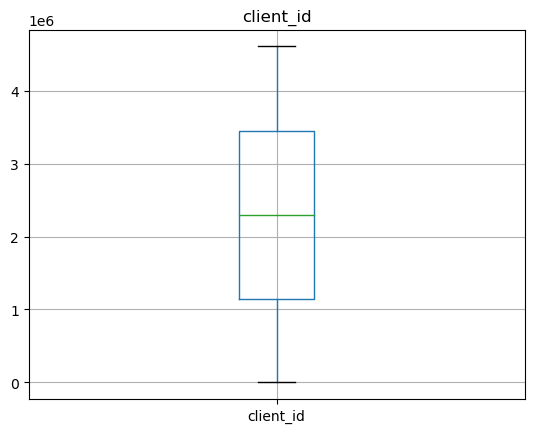

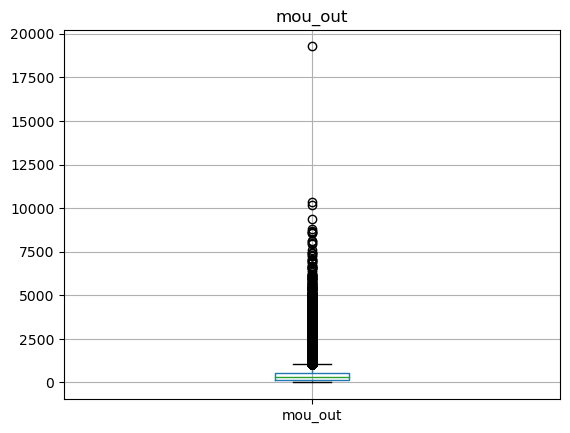

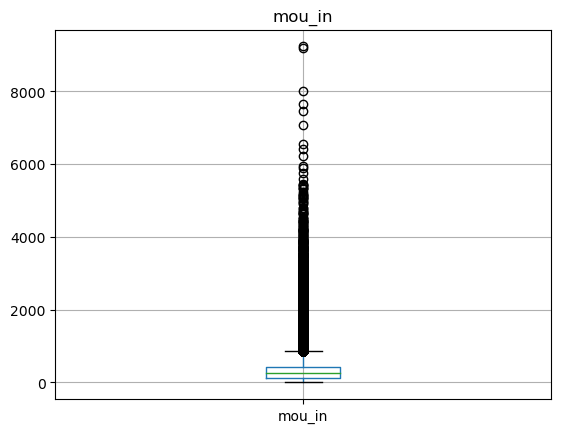

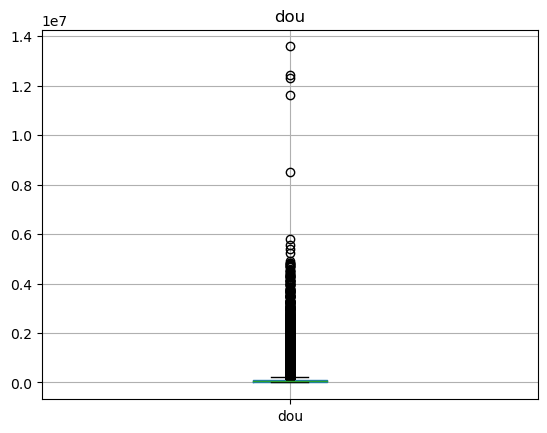

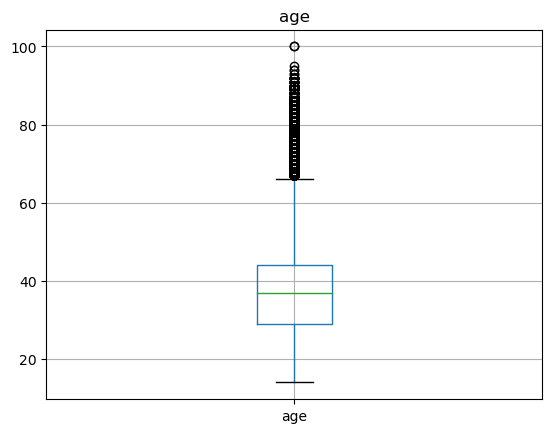

In [8]:
for column in dataset.columns:
    if column not in ('city', 'gender', 'admin_distr'):
        dataset.boxplot(column=column)
        plt.title(column)
        plt.show()

<Axes: >

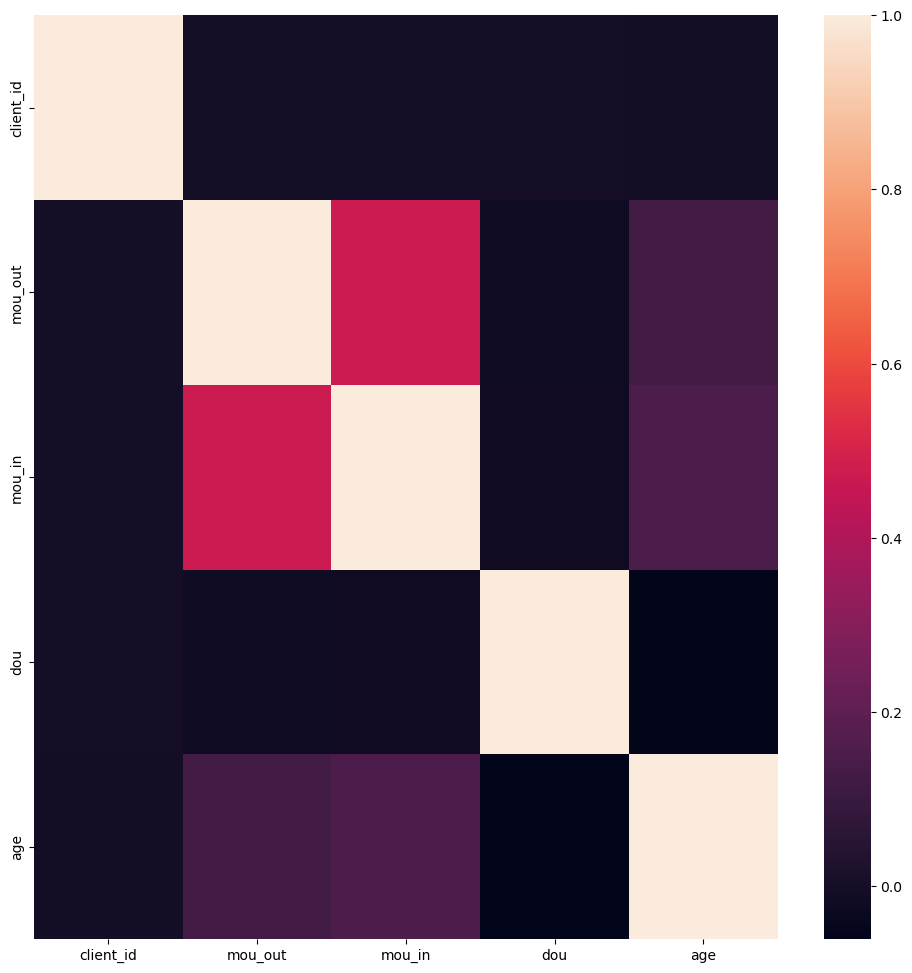

In [9]:
plt.figure(figsize=(12, 12))
sn.heatmap(dataset.drop(['city', 'gender', 'admin_distr'], axis=1).corr())